<a href="https://colab.research.google.com/github/hochschule-pforzheim/project-st23-team-f23/blob/main/3_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Wir arbeiten nun mit dem exportierten Datensatz '2_Data_for_Modeltraining.csv' aus 'Classification'. Den Datensatz legen wir auf Google Drive als Notebook ab, rufen ihn mit drive aus dem google.colab package auf und speichern ihn unter dem Variablen maindf für die weitere Verabreitung ab.

In [ ]:
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
maindf = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/2_Data_for_Modeltraining.csv")
#maindf = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI & ML/Projekt/2_Data_for_Modeltraining.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).




> Durch Ausgabe des Dataframes maindf können wir unseren aktuellen, über Google Drive in colab geladenen Datensatz einsehen.


In [ ]:
maindf

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stay_nights_sum,adults,children,babies,is_repeated_guest,...,country_CN,country_DEU,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA
0,0,342,2015,7,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,737,2015,7,1,0,2,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,7,2015,7,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
3,0,13,2015,7,1,1,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,14,2015,7,1,2,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90909,0,21,2017,8,30,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90910,0,23,2017,8,30,7,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
90911,0,34,2017,8,31,7,2,0,0,0,...,0,1,0,0,0,0,0,0,0,0
90912,0,109,2017,8,31,7,2,0,0,0,...,0,0,0,1,0,0,0,0,0,0


# **Vorbereitung des Datensatzes auf die Regression**



> Wir möchten durch eine Regression die 'average daily rate', also wie teuer ein Zimmer pro Nacht im Schnitt ist, vorhersagen. Dafür müssen wir zuerst aus den Daten die Spalte 'adr' entfernen bzw. diese seperat als y-Variable speichern, da es sich dabei um unsere target-Variable handelt. Durch den Train-Test-Split können wir später das Modell anhand der Trainingsdaten passend auf unsere X- und y-Daten trainieren und über den Abgleich der auf den X-test-Daten vorhergesagten y-Werten zu den tatsächlichen y-test-Daten die Präzision des Modells bestimmen.



> Mit dem Befehl `drop(columns='adr')` entfernen wir die adr-Spalte aus den X-Daten. Wir speichern sie dafür mit `y = maindf.adr`.





In [ ]:
X = maindf.drop(columns='adr')
y = maindf.adr



> Anschließend können wir die Daten mit der Funktion `train_test_split()`, die wir erst importieren müssen, in Trainings- und Testdaten aufteilen. Wir wählen hierfür eine Testgröße von 20% und den Random-State 42.



In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



> Mit diesem Split trainieren wir verschiedene Modelle und prüfen über die Accuracy und den f1-Score, welches Modell für unsere Daten die beste Performance bietet. Wir testen

*   Lineare Regression
*   Support Vector Mechine (LinearSVR)
*   Decision Tree
*   Gradient Boosting
*   XGBoost
*   Neuronale Netze




> Außerdem benötigen wir einige Module bzw. Funktionen für alle Modelle, die wir einmal gebündelt zu Beginn importieren:



In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
import numpy as np
import matplotlib.pyplot as plt


> Um unsere Ergebnisse vergleichen zu können, definieren wir nun noch eine `evaluate`-Function, die das Bestimmtheitsmaß (R2), den mittleren absoluten Fehler (MAE), den mittleren quadrierten Fehler (MSE), die Quadratwurzel des mittleren quadratischen Fehlers (RMSE) und den Mittlerer absoluter prozentualer Fehler (MAPE):




In [ ]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
def evaluate(reg, X_test, y_test):
  pred = reg.predict(X_test)
  print('R2:', r2_score(y_test, pred))
  print('MAE:', mean_absolute_error(y_test, pred))
  print('MSE:', mean_squared_error(y_test, pred))
  print('RMSE:', mean_squared_error(y_test, pred, squared=False))
  print('MAPE:', mean_absolute_percentage_error(y_test, pred))



> Für die Bewertung der Modelle betrachten wir insbesondere das Bestimmtheitsmaß und den mittleren absoluten Fehler.



## **Lineare Regression**

>Direkt zum Anfang soll eine Lineare Regression durchgeführt werden.

>Hierdurch kann ein Modell erstellt werden, durch das die Beziehungen zwischen einer abhängigen und einer oder mehreren unabhängigen Variablen beschrieben werden können. Bei einer einfachen linearen Regression soll der Einfluss untersucht werden, den eine unabhängige Variable auf eine abhängige hat. Gleiches gilt bei mehreren unabhängigen Variablen.

### **Dummy Regressor**

>Zur besseren Interpretierbarkeit der Modelle ist es oftmals gut von einem Basiswert bzw. einem Ausgangswert bzgl. der Leistung der Modelle zu haben.

>Ein Ausgangswert könnte das Modell des Dummy Regressors sein, das in diesem Fall den Durchschnittswert der Variable '`adr`' vorhersagen würde. Mit '`sklearn`' kann nun eine '`DummyRegressor`'-Modell berechnet werden, dass den Durchschnittswert der Zielvariablen prognostiziert. Dieser Wert kann zur Beurteilung anderer Modelle genutzt werden.

In [ ]:
from sklearn.dummy import DummyRegressor

In [ ]:
dummy = DummyRegressor()

>Das Modell wird nun auf die Trainingsdaten trainiert.

In [ ]:
dummy.fit(X_train, y_train)

>Anschließend kann es evaluiert werden. Deutlich ist, dass der 'R2'-Wert sehr schlecht ist. Aufgrund dessen wird es wohl sehr wahrscheinlich sein, dass andere Modelle über diesem Wert liegen werden.

In [ ]:
evaluate(dummy, X_test, y_test)

### **Ordinary Least Squares**

>Nun soll ein lineares Regressionsmodell mit dem Dummy Regressor verglichen werden. Dazu wird die Klasse 'Lineare Regression' aus 'sklearn.linear_model' importiert.

>Um mehrere Schritte in einem Modell kombinieren zu können, wird zudem durch eine Pipeline erstellt, durch die sowohl der '`Standard_Scaler`', als auch die '`LinearRegression`' vereint werden können. Durch die Funktion '`make_pipeline`' wird diese erstellt.

In [ ]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()

In [ ]:
linear_scaled = make_pipeline(StandardScaler(),
                              linear)

>Die definierte Pipeline wird nun dazu verwendet,anhand der Trainingsdaten von 'X' und 'y' das lineare Regressionsmodell zu trainieren. Der Skalierungsschritt ist hier ebenfalls schon enthalten.

In [ ]:
linear_scaled.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearregression', LinearRegression())])

>Das trainierte Regressionsmodell kann nun evaluiert werden.

>Der 'R2'-Wert beträgt dabei ~0,2634 (26,34%), was einer recht niedrigen Anpassung entspricht. Trotzdem ist dieser Wert höher, als der des errechneten Dummy Regressors. Der 'MAE'-Wert beträgt ~27,14, was einer durchschittlichen Abweichung zur Variable '`adr`' von 27€ entspricht.

In [ ]:
evaluate(linear_scaled, X_test, y_test)

R2: 0.42282568506105156
MAE: 27.16709864849837
MSE: 1397.8925400717944
RMSE: 37.38840114356048
MAPE: 5558511303644892.0


### **Ridge Regression**

>Über '`sklearn`' kann nun '`RidgeCV`' importiert werden.

In [ ]:
from sklearn.linear_model import RidgeCV

>Im nächsten Schritt soll das beste 'alpha' gefunden werden. Es wird festgelegt, dass dazu 200 Werte von 10^-10 bis 10^-1 getestet werden sollen.
Desweiteren wird eine Pipeline erstellt, durch die der '`Standard Scaler`' sowie die '`RidgeCV`'-Regression mit dem generierten 'alpha'-Werten verknüpft werden.

In [ ]:
n_alphas = 200
alphaValues = np.logspace(-10, -1, n_alphas)

linear_ridge = make_pipeline(StandardScaler(),
                             RidgeCV(alphas=alphaValues))

>Die Pipeline wird nun dazu verwendet,anhand der Trainingsdaten von 'X' und 'y' das Modell zu trainieren.

In [ ]:
linear_ridge.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('ridgecv',
                 RidgeCV(alphas=array([1.00000000e-10, 1.10975250e-10, 1.23155060e-10, 1.36671636e-10,
       1.51671689e-10, 1.68318035e-10, 1.86791360e-10, 2.07292178e-10,
       2.30043012e-10, 2.55290807e-10, 2.83309610e-10, 3.14403547e-10,
       3.48910121e-10, 3.87203878e-10, 4.29700470e-10, 4.76861170e-10,
       5.29197874e-10, 5.87278661...
       9.11588830e-03, 1.01163798e-02, 1.12266777e-02, 1.24588336e-02,
       1.38262217e-02, 1.53436841e-02, 1.70276917e-02, 1.88965234e-02,
       2.09704640e-02, 2.32720248e-02, 2.58261876e-02, 2.86606762e-02,
       3.18062569e-02, 3.52970730e-02, 3.91710149e-02, 4.34701316e-02,
       4.82410870e-02, 5.35356668e-02, 5.94113398e-02, 6.59318827e-02,
       7.31680714e-02, 8.11984499e-02, 9.01101825e-02, 1.00000000e-01])))])

>Es wird ein Wert von 0,1 als bestes 'alpha' ausgegeben

>'alpha' gibt dabei einen Wert des Regularisierungsparameters an. Dadurch wird die Stärke der Regularisierung gesteuert.

In [ ]:
linear_ridge[1].alpha_

0.1

>Zuletzt soll ebenfall geschaut werden, ob sich die 'Ridge Regression' zum 'Ordinary Least Squares'-Modell unterscheidet.

>Beide Modelle erzielen jedoch den gleichen 'R2'-Wert.

In [ ]:
evaluate(linear_ridge, X_test,y_test)

NameError: ignored

>Aufgrund der des niedrigen 'R2'-Werts und des relativ hohen 'MAE'-Wert, wurde auf ein Hyperparameter Tuning verzichtet, da andere Modelle höhere Werte erzielten.

>Es wird außerdem noch der Mittelwert der Spalte '`adr`' aus dem Dataframe berechnet. Dieser beträgt ca. 102,22.

In [ ]:
maindf.adr.mean()

## **SVM**



> Als nächstes trainieren und evaluieren wir mithilfe des Support Vector Machine Regressors. Da wir große Datenmengen in das Modell geben, reicht die Standard-Implementierung nicht aus, wir benötigen `LinearSVR` von `sklearn`.




In [ ]:
from sklearn.svm import LinearSVR



> Wir bilden eine Pipeline, in der zuerst die Daten skaliert und dann direkt in das LinearSVR-Modell gegeben werden. Für das Modell verwenden wir wieder den random_state 42 und tol=1e-5. tol bezeichnet dabei den Toleranzwert, unter den der LinearSVR trainiert werden soll. Das Training wird beendet, wenn die Vorhersagen weniger oder gleich dem Toleranzwert von den tatsächlichen Zielwerten abweichen.
Ein niedriger Toleranzwert führt zwar zu einer hohen Genauigkeit, verlangsamt dafür aber das Training.

In [ ]:
lsvr = make_pipeline(StandardScaler(),
                     LinearSVR(random_state=42, tol=1e-5))



> Das Modell kann dann auf die Trainingsdaten trainiert werden.



In [ ]:
lsvr.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvr', LinearSVR(random_state=42, tol=1e-05))])


> Nach Beenden des Trainings evaluieren wir den LinearSVR anhand der Testdaten.




In [ ]:
evaluate(lsvr, X_test, y_test)

R2: 0.39195938175867595
MAE: 26.760446916694537
MSE: 1472.649461870278
RMSE: 38.37511513820223
MAPE: 5481775411882708.0




> Mit einem Bestimmtheitsmaß von rund 39% ist das Modell nicht sehr stark. Wir versuchen deshalb noch weitere Modelle.



## **Decision Tree**

> Als Nächstes soll eine Entscheidungsbaum Regression bzw. eine Decision Tree Regression durchgeführt werden. Dieser Algorithmus wird ebenfalls aufgebaut, wie ein Entscheidungsbaum bei einer Klassifikation. Der Unterschied bei einer Regression liegt darin, dass hier darauf abgezielt wird den Wert eine kontinuierlichen Zielvariable vorhersagen zu können. Grundlage dafür sind die Merkmalswerte der Eingabevariablen.

>Der Vorteil von Entscheidungsbaum Regressionen kann darin gesehen werden, dass sie durch die Darstellung der Entscheidungspfade, auf denen die Vorhersagen basieren, leicht zu interpretiert sind.

>Zunächst wir aus der Bibliothek Scikit-Learn die Klasse '`sklearn.tree`' mit dem '`DecisionTreeRegressor`' importiert.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

>Zunächst wird ein Objekt des '`DecisionTreeRegressors`' erstellt. Für die Reproduzierbarkeit der Ergebnisse ist der '`random_state = 42`'. Dies ist die Default Einstellung. Zusätzlich wird dies als Variable '`tree`' gespeichert.


In [ ]:
tree = DecisionTreeRegressor(random_state=42)

>Die Variable '`tree`' wird nun mit den Trainingsdaten '`X_train`' und '`Y_train`' trainiert. Nach Abschluss des Trainings, kann das Modell verwendet werden, um Vorhersagen zu treffen.


In [ ]:
tree.fit(X_train, y_train)

>Mit '`evaluate`' werden die zuvor importierten Metriken berechnet.

>Das Bestimmtheitsmaß 'R2' gibt an, wie gut die Varianz der abhängigen Variable im Modell erklärt werden kann. Es liegt zwischen 0 und 1, wobei 1 eine perfekte Anpassung der Daten an das Modell darstellt. In diesem Fall liegt das 'R2' bei einem Wert von ~0,3798, also 37,98%. Dies bedeutet, dass nur gut ein Drittel der Varianz der Zielvariable erklärt wird.

>Der 'MAE', der mittlere absolute Fehler sollte ebenfalls beachtet werden. Hierbei wird eine durchschnittliche Abweichung zwischen vorhergesagtem und tatsächlichen Wert berechnet. Hier liegt der 'MAE' bei ~17,03. Das bedeutet, dass die '`adr`' im Modell durchschnittlich um ca. 17€ falsch vorhergesagt wird.

In [ ]:
evaluate(tree, X_test, y_test)

>Der Entscheidungsbaum kann zur besseren Interpretierbarkeit auch geplottet werden. Die Abbildung soll mit '`figsize=(10,10)`' auf 10x10 Zoll festgelegt werden. Zudem sollen lediglich die ersten beiden Ebenen ('`max_depth=2`') angezeigt werden. Die '`fontsize=10`' legt die Schriftgröße fest und unter '`feature_names=X.columns`' werden die Namen, der im Entscheidungsbaum berücksichtigten Merkmale ausgegeben.

> am wichtigsten scheint die durchschnittliche Temperatur zu sein da dies die Wurzel des Entscheidungsbaumes ist. Auf die '`adr`' haben zudem die Variablen '`city_Lisbon`' sowie '`children`' eine Auswirkung, auch wenn diese mit <=0,5 gering ist.

In [ ]:
from sklearn import tree as sktree
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))

sktree.plot_tree(tree, max_depth=2, fontsize=10, feature_names=X.columns);

>Um die Ergebnisse nun in einem zweidimensionalem Diagramm darstellen zu können, sollte zurest eine unabhängige Variable ausgesucht werden. Die abhängige Variable ist in diesem Fall wieder '`adr`'. Durch das Erstellen des Entscheidungsbaums wurden die Variablen schon errechnet, die den meinsten Einfluss auf die abhängige Variable haben. In diesem Fall ist dies die Variable '`average_temperatur`'.

> Dazu sollten die zuerst die Vorhersagen mit den Markmalen der abhängigen Variable '`adr`' zu einem Dataframe zusammengeführt werden.

In [ ]:
predictions = tree.predict(X_test)
maindf_with_predictions = pd.concat([X_test, y_test], axis='columns')
maindf_with_predictions = pd.concat([maindf_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=maindf_with_predictions.index)], axis=1)

>Im nächsten Schritt soll der Dataframe in aufsteigender Reihenfolge durch die unabhängige Variable geordnet werden.

In [ ]:
maindf_with_predictions = maindf_with_predictions.sort_values(by='average_temperature')

>Der Plot wird nun erstellt.

>Wie angegeben repräsentieren die Punkte einzelne Datenpunkte. Die blaue Linie hingegen soll die Vorhersagen des Entscheidungsbaumes verdeutlichen. Bei Overfitting könnten Pruning-Methoden weiterhelfen.

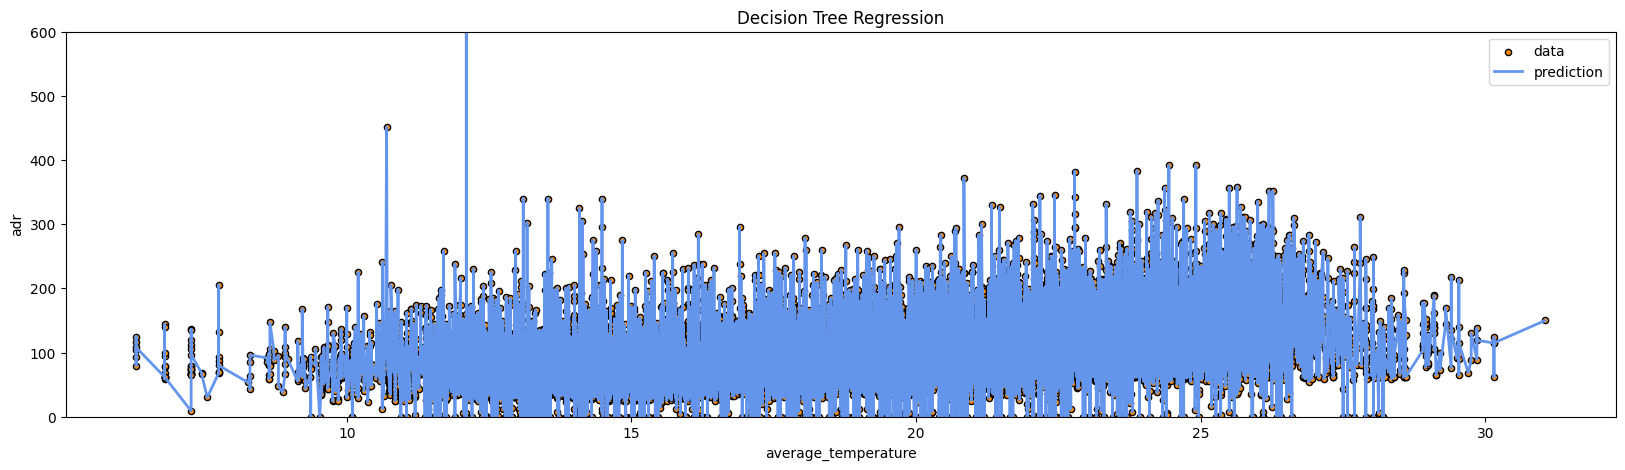

In [ ]:
ax = maindf_with_predictions.plot(x='average_temperature', y='adr', kind='scatter', s=20, edgecolor='black',
            c='darkorange', label='data', figsize=(20,5), ylim=([0, 600]))

maindf_with_predictions.plot(x='average_temperature', y='adr', kind='line', color='cornflowerblue',
         label='prediction', linewidth=2, ax=ax)

ax.set_xlabel('average_temperature')
ax.set_ylabel('adr')
ax.set_title('Decision Tree Regression')
ax.legend()

### **Hyperparameter Tuning**

>Um herauszufinden, ob das Modell noch verbessert werden kann, wird noch ein Hyperparameter Tuning mit '`GridSearchCV`' durchgeführt. Zudem wird der Entscheidungsbaumregressor nochmals definiert.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

>Im nächsten Schritt werden die Hyperparameter der GridSearch definiert.

>Der Hyperparameter '`max_depth`' gibt die Tiefe des Entscheidungsbaumes an, wobei '`None`' für keine Begrenzung steht.

>'`min_samples_split`' gibt die Mindestanzahl der erforderlichen Werte an, um einen 'internal' node zu teilen

>'`min_samples_leaf`' gibt die Mindestanzahl der erforderlichen Werte an, die an einem 'leaf node' sind.



In [ ]:
param_grid = {
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

>Dann wird die GridSearch durchgeführt. Zudem wird das Modell auf die Daten von 'X_train' und 'y_train' trainiert.

In [ ]:
grid_search = GridSearchCV(tree, param_grid, cv=5)
grid_search.fit(X_train, y_train)

>Dann wird die GridSearch durchgeführt. Zudem wird das Modell auf die Daten von 'X_train' und 'y_train' trainiert.

>Die besten Parameter aus der GridSearch sollen nun gefunden werden. Sie sollen als 'Beste Hyperparameter' ausgegeben werden.

>Der Parameter '`max_depth`' beträgt in diesem Falle 'None', die '`min_samples_leaf`' beträgt 4 und die '`min_samples_split`' beträgt 10.

In [ ]:
best_params = grid_search.best_params_
print("Beste Hyperparameter:", best_params)

>Im Anschluss wird der Entscheidungsbaumregressor mit den gefundenen, besten Hyperparametern trainiert. Diese werden automatisch übergeben.

In [ ]:
best_tree = DecisionTreeRegressor(**best_params)
best_tree.fit(X_train, y_train)

>Mit dem trainierten Entscheidungsbaum sollen nun Vorhersagen für die Testdaten getroffen werden.


In [ ]:
y_pred = best_tree.predict(X_test)

>Nach dem Hyperparameter Tuning hat sich das 'R2' auf ~0,4340 (43,40%) verbessert. Ebenfalls ist auch der 'MAE'-Wert gesunken und liegt nun bei ~16,32. So würde sich die Vorhersage der '`adr`' im Durchschnitt ca. 16€ daneben liegen.


In [ ]:
evaluate(best_tree, X_test, y_test)

>Dieses Modell hat sich durch das Hyperparameter Tuning zwar verbessert, es kann aber bestimmt noch ein besseres Modell gefunden werden.

## **Gradient Boosting**



> Nach Training und Evaluation des Decision Trees versuchen wir wieder die Ensemble-Implementierung Gradient Boosting, die aus vielen schwächeren Decision Trees ein stärkeres Modell entwickelt. Dafür benötigen wir den `GradientBoostingRegressor` von `sklearn`.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor



> Wir erstellen die Pipeline aus Scaler und Regressor. Danach trainieren wir das Modell.



In [ ]:
gb = make_pipeline(StandardScaler(),
                   GradientBoostingRegressor(random_state=42))

In [ ]:
gb.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('gradientboostingregressor',
                 GradientBoostingRegressor(random_state=42))])



> Die Evaluation zeigt, dass GradientBoosting mit einem Bestimmtheitsmaß von 0,64 deutlich besser performt, als die vorherigen Modelle. Der mittlere absolute Fehler liegt bei 20,86, was bedeutet, dass im Schnitt das Modell die adr um rund 21€ falsch vorhersagt. Wir versuchen, durch Hyperparameter Tuning die Ergebnisse
 noch zu verbessern.



In [ ]:
evaluate(gb, X_test, y_test)

R2: 0.6419541401266158
MAE: 20.865622348836478
MSE: 867.1724010683622
RMSE: 29.44779110677679
MAPE: 3956896952791488.0


### **Hyperparameter Tuning**



> Für das Hyperparameter Tuning erstellen wir ein Grid, das die notwendigen Hyperparameter definiert, die im Tuning getestet werden sollen, um daraus die Hyperparameter zu ermitteln, die die besten Ergebnisse erzielen.



In [ ]:
gb_params = gb.get_params()

In [ ]:
param_grid = {
    'gradientboostingregressor__loss': ['ls', 'lad', 'huber', 'quantile'],
    'gradientboostingregressor__learning_rate': [0.05, 0.1, 0.2, 0.3],
    'gradientboostingregressor__n_estimators': [100, 500, 1000],
    'gradientboostingregressor__max_depth': [3, 5, 7, 9],
    'gradientboostingregressor__min_samples_split': [2, 4, 6],
    'gradientboostingregressor__min_samples_leaf': [1, 2, 3],
    'gradientboostingregressor__random_state': [42],
    'standardscaler': [StandardScaler(), None],
}



> Wir nutzen nun wieder die RandomizedSearch in Kombination mit cross-validation. Wir übergeben das Modell, das Grid, die Anzahl an Iterationen, die Angabe `n_jobs=-1`, um alle verfügbaren Prozessoren für diese Aufgabe zu nutzen und so eine möglichst niedrige Berechnungszeit zu erreichen, den random_state 42, die Bestimmung der cross-validation auf 5 Folds sowie die Ausgaben (verbose=1) während des Suchprozesses.

> Wir setzen zudem die Iterations auf n_iter=10, um die Laufzeit im Rahmen zu halten, da das Durchlaufen des Modells ca. eine Stunde dauert.

In [ ]:
optimized_gb = RandomizedSearchCV(gb, param_grid, n_iter=10, n_jobs=-1, random_state=42, cv=5, verbose=1)
optimized_gb.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py", line 420, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/s

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('standardscaler',
                                              StandardScaler()),
                                             ('gradientboostingregressor',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_jobs=-1,
                   param_distributions={'gradientboostingregressor__learning_rate': [0.05,
                                                                                     0.1,
                                                                                     0.2,
                                                                                     0.3],
                                        'gradientboostingregressor__loss': ['ls',
                                                                            'lad',
                                                                            'huber',
                                                                            'quantile'],
                                        'gradientboostingregressor__max_depth': [3,
                                                                                 5,
                                                                                 7,
                                                                                 9],
                                        'gradientboostingregressor__min_samples_leaf': [1,
                                                                                        2,
                                                                                        3],
                                        'gradientboostingregressor__min_samples_split': [2,
                                                                                         4,
                                                                                         6],
                                        'gradientboostingregressor__n_estimators': [100,
                                                                                    500,
                                                                                    1000],
                                        'gradientboostingregressor__random_state': [42],
                                        'standardscaler': [StandardScaler(),
                                                           None]},
                   random_state=42, verbose=1)



> Nach dem Tuning geben wir nun die bestmögliche Kombination an Hyperparametern aus, die wir durch Hyperparameter Tuning finden konnten und Evaluieren das optimierte Modell.



In [ ]:
optimized_gb.best_params_

{'standardscaler': StandardScaler(),
 'gradientboostingregressor__random_state': 42,
 'gradientboostingregressor__n_estimators': 500,
 'gradientboostingregressor__min_samples_split': 6,
 'gradientboostingregressor__min_samples_leaf': 1,
 'gradientboostingregressor__max_depth': 5,
 'gradientboostingregressor__loss': 'huber',
 'gradientboostingregressor__learning_rate': 0.3}

In [ ]:
evaluate(optimized_gb, X_test, y_test)

R2: 0.787219836415364
MAE: 14.103365004030817
MSE: 515.3448371687874
RMSE: 22.70120783502031
MAPE: 3201454514603270.5


> Das Modell hat sich deutlich verbessert, das Bestimmtheitsmaß liegt nun bei 0,787 und der MAE bei 14,10. Geht das mit einem anderen Modell noch besser?

## **XGB Regression**



> Als nächstes testen wir noch die XGB Regression, da diese bei der Classification ein vielversprechendes Modell war. Dafür importieren wir den `XGBRegressor` von `xgboost`, bilden die Pipeline und trainieren das Modell auf die Trainingsdaten. Im Anschluss evaluieren wird wieder anhand der Testdaten.


In [ ]:
from numpy import loadtxt
from xgboost import XGBRegressor
from xgboost import plot_tree

xgb = make_pipeline(StandardScaler(),
                    XGBRegressor())
xgb.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('xgbregressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [ ]:
evaluate(xgb, X_test, y_test)

R2: 0.7509161676659613
MAE: 15.697374519474966
MSE: 603.2708352745688
RMSE: 24.56157232903807
MAPE: 3262864847176914.5




> Wir können nun unsere y-Werte vorhersagen.



In [ ]:
y_pred = xgb.predict(X_test)

### **Hyperparameter Tuning**



> Um das Modell, das bisher am besten performt nochmals zu verbessern, führen wir auch hier Hyperparameter Tuning durch. Dafür definieren wir wieder das Grid mit den notwendigen Parametern und übergeben es mit dem Modell, cross-validation, Iterations-Anzahl etc. in die RandomizedSearchCV.



In [ ]:
xgb_params = xgb.get_params()

In [ ]:
regressor=XGBRegressor()

grid = {
    'n_estimators': [100, 500, 900, 1100, 1500],
    'max_depth':[2, 3, 5, 10, 15],
    'learning_rate':[0.05,0.1,0.15,0.20],
    'booster':['gbtree','gblinear'],
    'base_score':[0.25,0.5,0.75,1]
    }

random_cv = RandomizedSearchCV(estimator=regressor,
            param_distributions=grid,
            cv=5, n_iter=10,
            scoring = 'neg_mean_absolute_error', n_jobs = -1,
            verbose = 1,
            return_train_score = True,
            random_state=42)



> Wir trainieren das Hyperparameter-Tuning-Modell auf die Trainingsdaten und geben uns die besten estimators aus.



In [ ]:
optimized_xgb = random_cv.fit(X_train,y_train)
optimized_xgb_est = random_cv.best_estimator_

Fitting 5 folds for each of 10 candidates, totalling 50 fits




> Auch die Kombination der besten Parameter ist für uns interessant und wir lassen sie auflisten:



In [ ]:
optimized_xgb.best_params_

{'n_estimators': 500,
 'max_depth': 15,
 'learning_rate': 0.05,
 'booster': 'gbtree',
 'base_score': 1}


> Das Ergebnis mit einem Bestimmtheitsmaß von 79,62% und einem MAE von 2,44€ ist ziemlich gut.
Wir sehen an dem großen Unterschied zwischen der Accuracy mit den Trainingsdaten zu der auf den Testdaten, dass das Modell zwar sehr gut auf den Trainingsdaten läuft, das Modell allerding so stark an die Trainingsdaten angepasst ist, dass es die Testdaten nicht mehr so genau abbilden kann (Overfitting).



In [ ]:
print('Accuracy on trainingsdata is:')
evaluate(optimized_xgb, X_train, y_train)

print('Accuracy on testdata is:')
evaluate(optimized_xgb, X_test, y_test)

Accuracy on trainingsdata is:
R2: 0.991591134545762
MAE: 2.4459816879123095
MSE: 22.564013270639407
RMSE: 4.750159288975413
MAPE: 409555951761965.9
Accuracy on testdata is:
R2: 0.7962447174361471
MAE: 12.366158402925478
MSE: 493.4869451464741
RMSE: 22.21456605802765
MAPE: 2770714546503008.0




> Auch mit dem verbesserten Modell können wir unsere y-Werte vorhersagen.



In [ ]:
best_xgb = optimized_xgb.best_estimator_
y_best_predict = best_xgb.predict(X_test)

### **Plotting**

In [ ]:
plot_tree(best_xgb)
plt.show()



> Mithilfe der optimierten XGBoost-Modells (das aus dem besten durch das Hyperparameter Tuning ermittelten Schätzer besteht) können wir nun Vorhersagen für die y-Werte auf Basis der X-Test-Daten treffen.

> Für die weitere Berechnung müssen wir außerdem die Anzahl an verwendeten Schätzern (`n_estimators`) für das optimierte Modell ermitteln.

> Diese Schätzer werden mit dem Befehl `np.zeros` in einem Array, gefüllt mit den n_estimators und Nullen, gespeichert.

> Mithilfe einer `for-Loop` wird für jede Vorhersage der Devianzfehler (=Residuenfehler) zwischen den Vorhersagen (`predictions`) und den wahren Werten (`y_test`) berechnet. Diese Fehler werden im entsprechenden Index in test_score gespeichert.





> Die Devianz der Trainingsdaten können wir nun in einem Diagramm der Devianz der Testdaten in Abhängigkeit von den Boosting-Iterationen gegenüberstellen. So können wir den Fortschritt von Boosting-Prozessen und mögliches Overfitting bewerten.



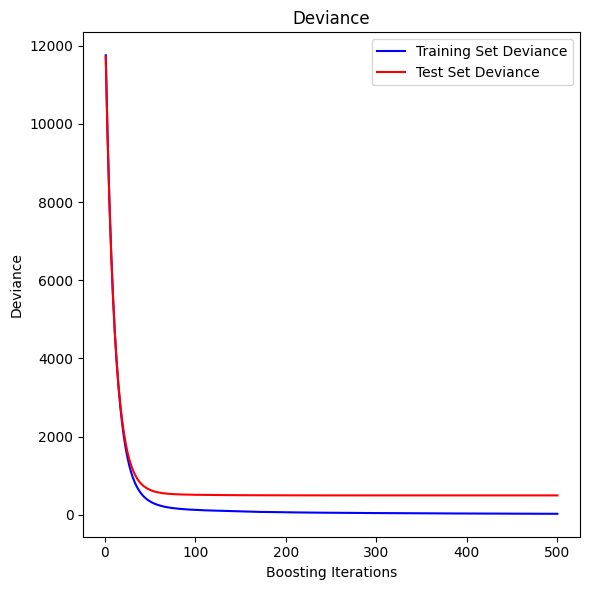

In [ ]:
best_xgb = optimized_xgb.best_estimator_
n_estimators = optimized_xgb.best_params_['n_estimators']

test_score = np.zeros((n_estimators,), dtype=np.float64)
train_score = np.zeros((n_estimators,), dtype=np.float64)
for i in range(n_estimators):
    y_train_pred = best_xgb.predict(X_train, iteration_range=(0, i+1))
    y_pred = best_xgb.predict(X_test, iteration_range=(0, i+1))
    test_score[i] = mean_squared_error(y_test, y_pred)
    train_score[i] = mean_squared_error(y_train, y_train_pred)

plt.figure(figsize=(6, 6))
plt.title('Deviance')
plt.plot(np.arange(n_estimators) + 1, train_score, 'b-',
         label='Training Set Deviance')
plt.plot(np.arange(n_estimators) + 1, test_score, 'r-',
         label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
plt.tight_layout()
plt.show()

> Um den Test-Loss gegen den Training-Loss aufzutragen, müssen wir zuerst die optimierten n_estimators speichern, den test- und trainings-Score mithilfe der Numpy-Funtion `zero` erzeugen und für jeden estimator i in n_estimators auf Basis der Trainings- sowie der Testdaten die y-Werte vorhersagen und unter test- bzw- trainings-score den mittleren quadrierten Fehler speichern. Diese Scores können dann unter dem Label 'Training Set Deviance' bzw. 'Test Set Deviance' geplottet werden.

> Wir sehen, dass der Fehler bei den Test Daten ein bisschen größer ausfällt, als bei den Trainingsdaten. Vermutlich leidet unser Modell unter Overfitting. Allerdings können wir nun ablesen, dass , dass ca. nach 50 Iterationen der Lerneffekt des Modells nicht zunimmt bzw. die Fehlerquote nicht mehr merklich abnimmt. Dies bedeutet, dass wir unsere Iterationen beim Training auf ca. 50 beschränken können.

### **Error Analysis**



> Durch eine grundlegende Fehleranalyse wollen wir außerdem ermitteln, wo das Modell besonders schlecht performt, wo es also noch fehlerhaft ist.
Dafür fügen wir die X- und y-Testdaten, sowie die Preditions (als neue Spalte 'Predicitions') dem Dataframe an.



In [ ]:
predictions = optimized_xgb.predict(X_test)
maindf_with_predictions = pd.concat([X_test, y_test], axis='columns')
maindf_with_predictions = pd.concat([maindf_with_predictions, pd.DataFrame(predictions, columns=['Prediction'], index=maindf_with_predictions.index)], axis=1)

In [ ]:
maindf_with_predictions

,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stay_nights_sum,adults,children,babies,is_repeated_guest,...,country_ESP,country_GBR,country_IRL,country_ITA,country_NLD,country_PRT,country_SWE,country_USA,adr,Prediction
51109,1,56,2017,2,1,3,2,0,0,0,...,0,0,0,0,0,1,0,0,60.00,59.899277
78776,0,195,2016,10,28,4,2,0,0,0,...,0,1,0,0,0,0,0,0,96.30,101.924644
42532,1,177,2016,6,3,2,2,0,0,0,...,0,0,0,0,0,1,0,0,100.00,99.981667
6404,1,118,2016,7,25,7,2,0,0,0,...,1,0,0,0,0,0,0,0,162.86,176.072449
51888,1,28,2017,3,2,3,2,0,0,0,...,0,0,0,0,0,1,0,0,95.00,95.011871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36221,1,26,2015,10,4,5,2,0,0,0,...,0,0,0,0,0,1,0,0,79.85,92.765816
75548,0,3,2016,8,28,1,1,0,0,0,...,0,0,1,0,0,0,0,0,80.00,118.925827
36192,1,89,2015,10,3,4,2,0,0,0,...,0,0,0,0,0,1,0,0,62.00,62.244411
19223,0,31,2016,4,18,2,2,0,0,0,...,0,1,0,0,0,0,0,0,75.00,82.401703




> Dann berechnen wir die Differenz der vorhergesagten Werte (predicitions) zu den tatsächlichen Werten (y-test) als MAE (Mean Absolute Error).



In [ ]:
maindf_with_predictions['pred_diff'] = np.abs(maindf_with_predictions['adr'] - maindf_with_predictions.Prediction)



> Diese Differenz schauen wir uns dann in einem Histogramm an. Die durch den Algorithmus predicteten Werte weichen sehr häufig um 50€ von den tatsächlichen Werten ab. Vergleichsweise selten weicht das Modell stark (>50€) vom eigentlichen Wert ab. Dies scheint soweit erstmal logisch.



<Axes: ylabel='Frequency'>

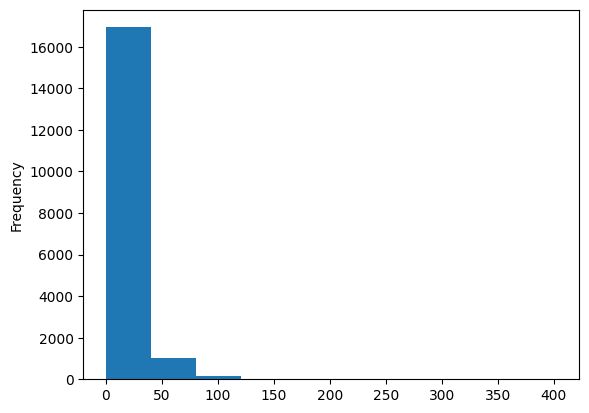

In [ ]:
maindf_with_predictions.pred_diff.plot(kind='hist')



> Wir plotten nun jeweils die original Testdaten gegenüber den Testdaten, bei denen unser Modell jeweils um mehr als 50€ abweicht.



<ipython-input-20-cc989c2a3656>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell


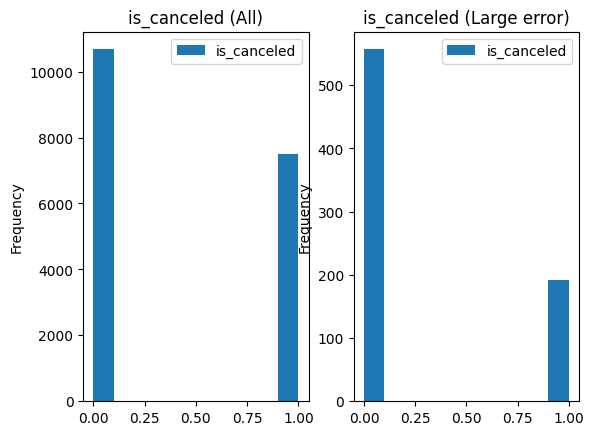

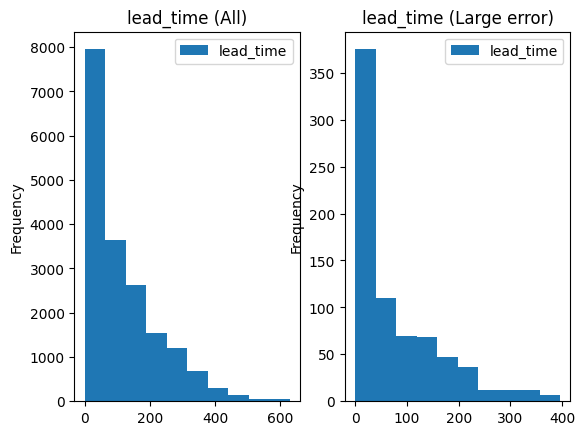

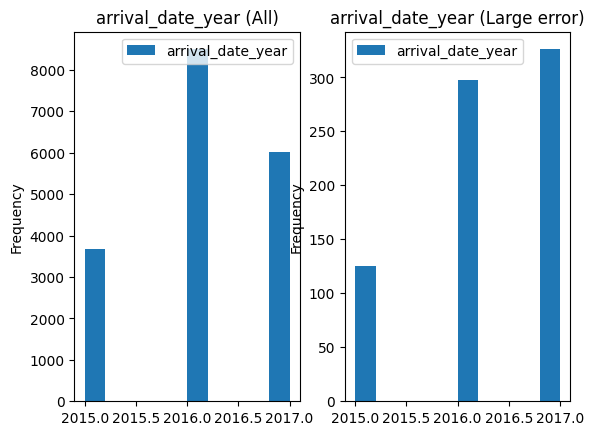

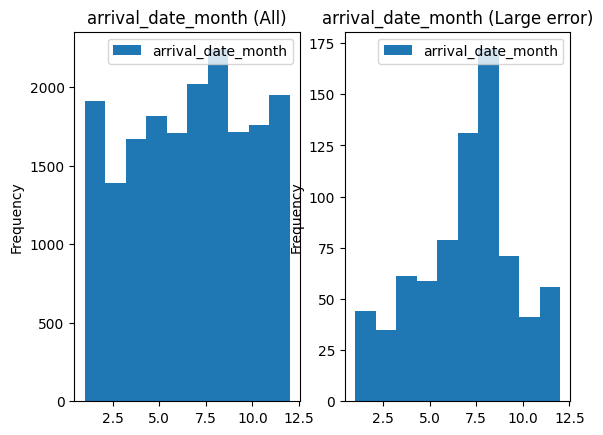

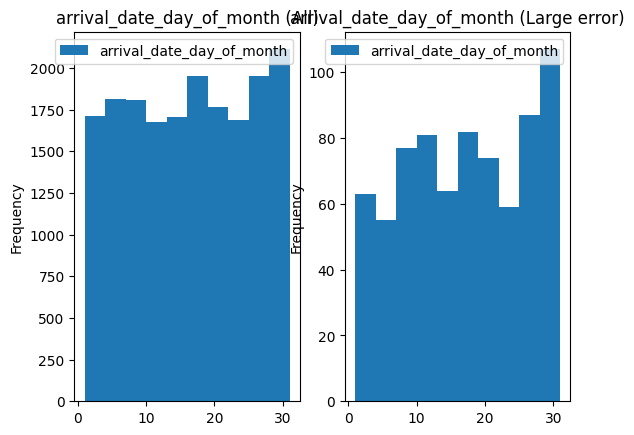

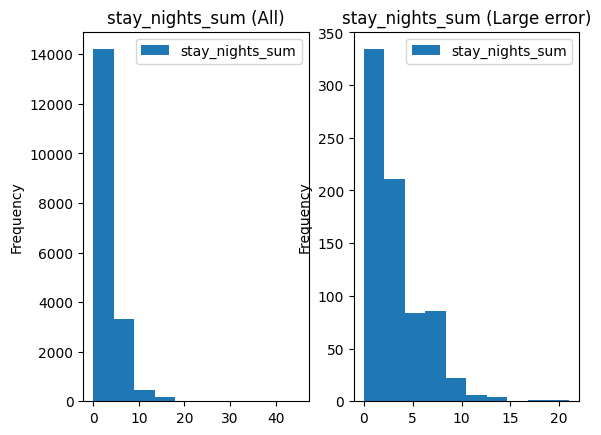

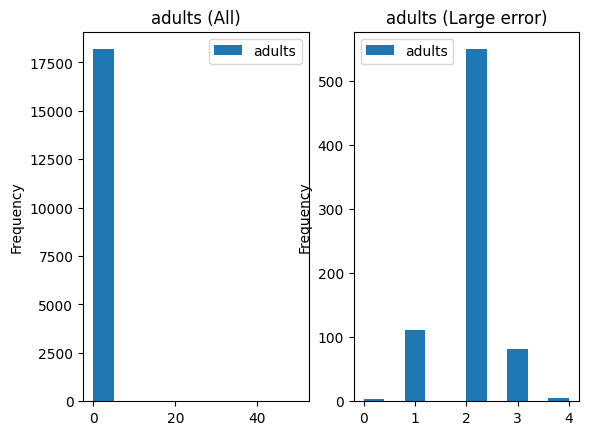

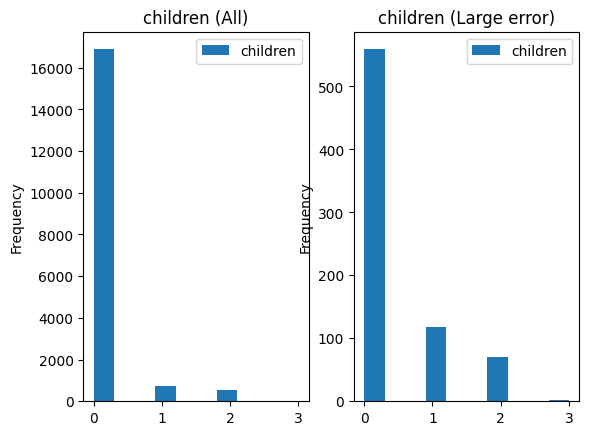

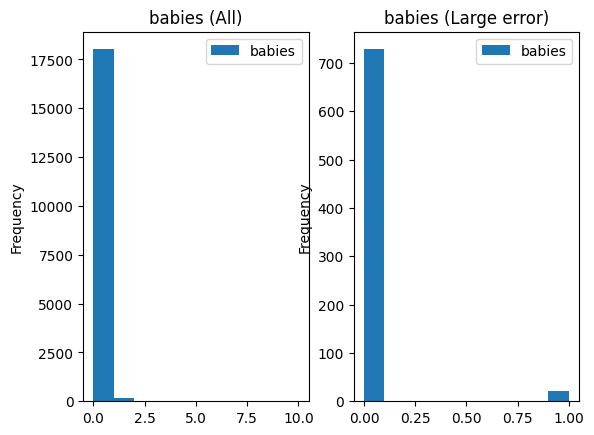

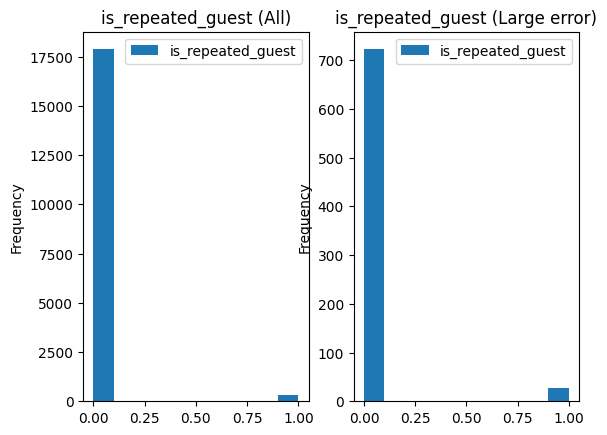

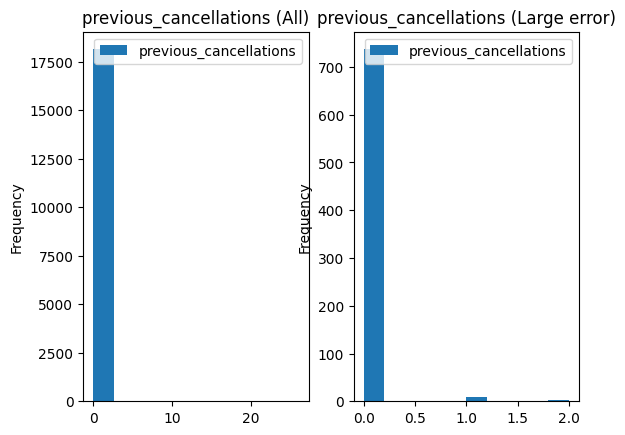

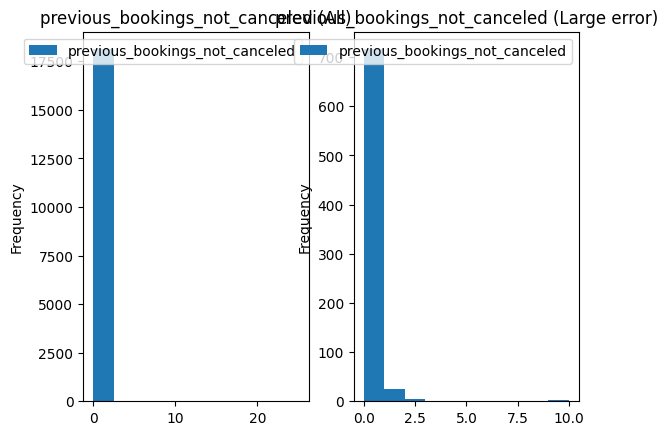

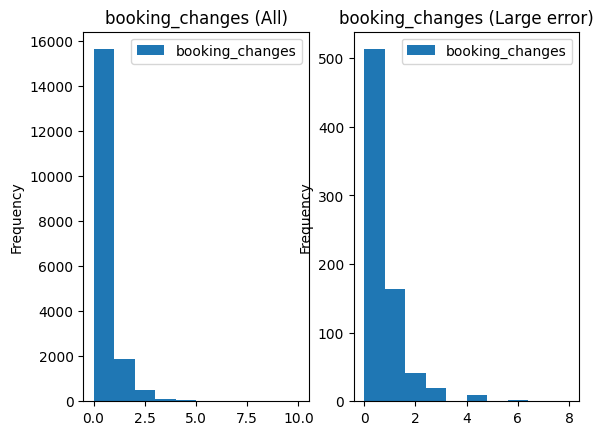

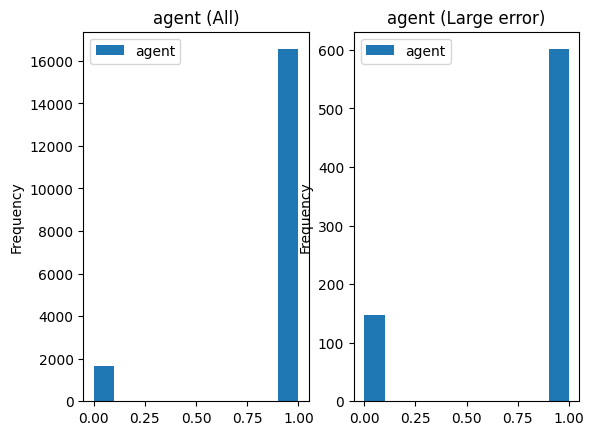

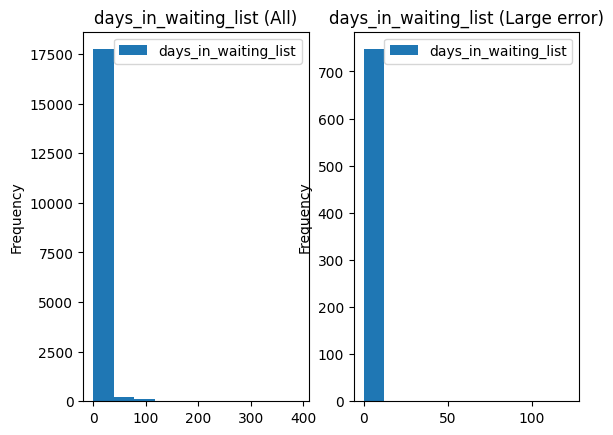

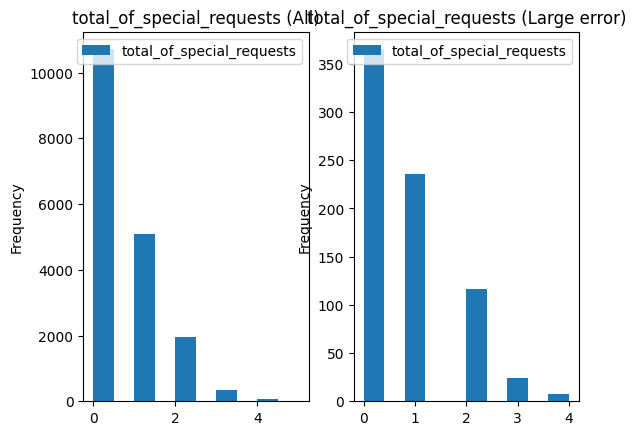

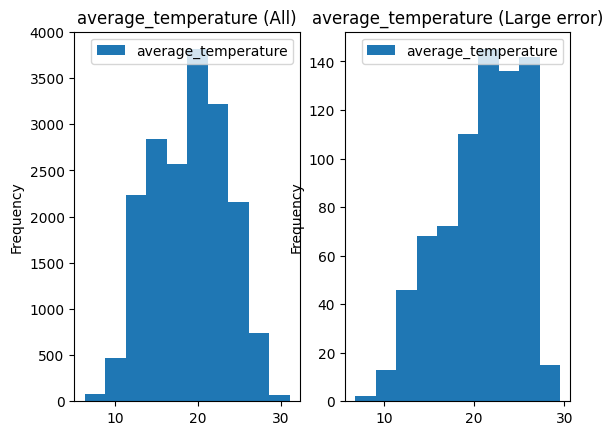

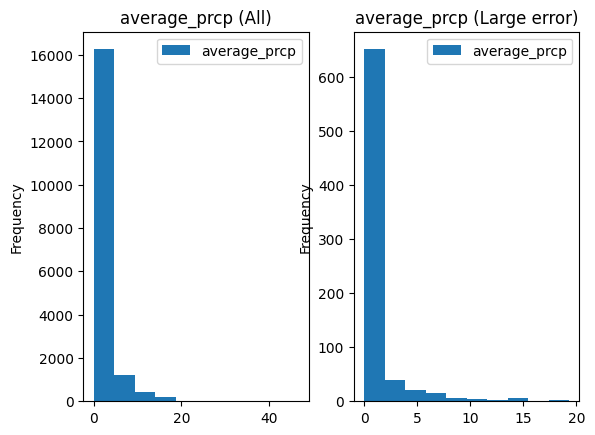

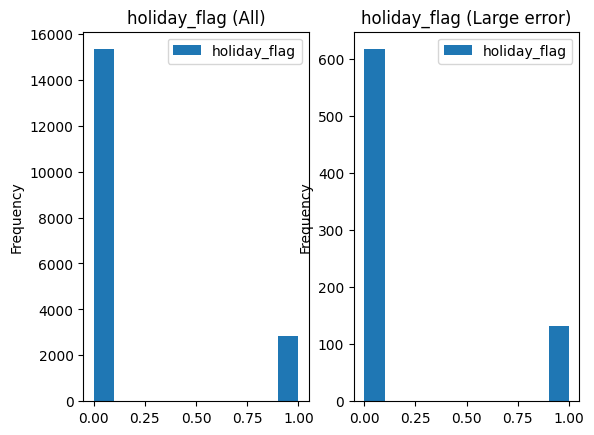

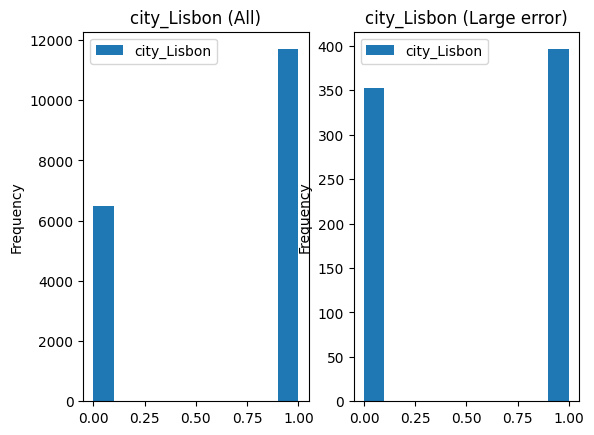

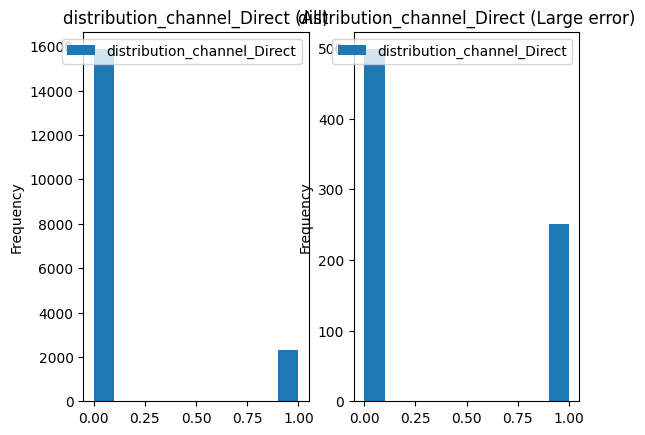

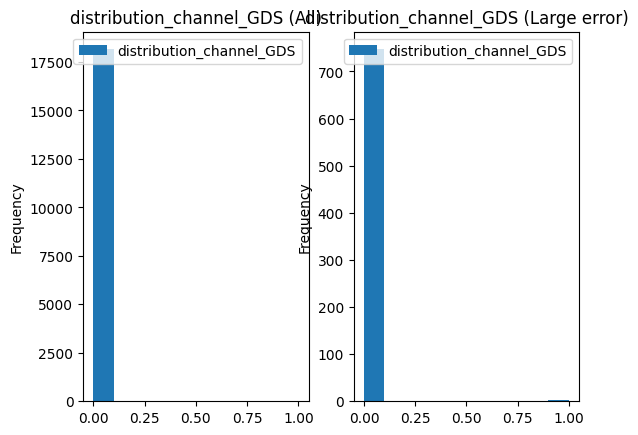

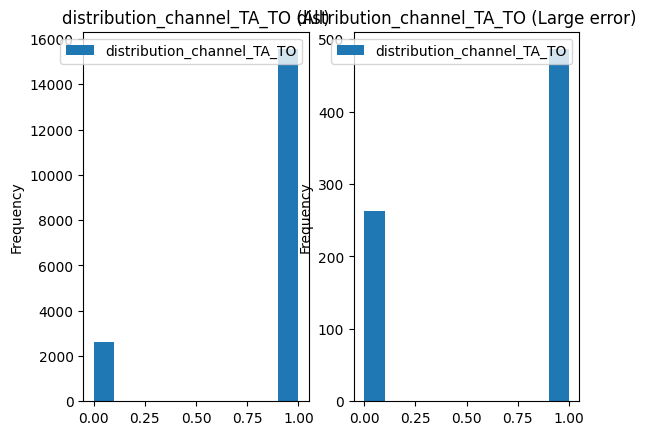

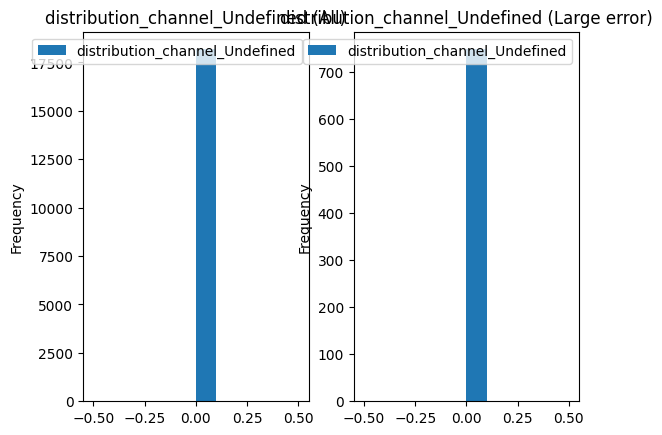

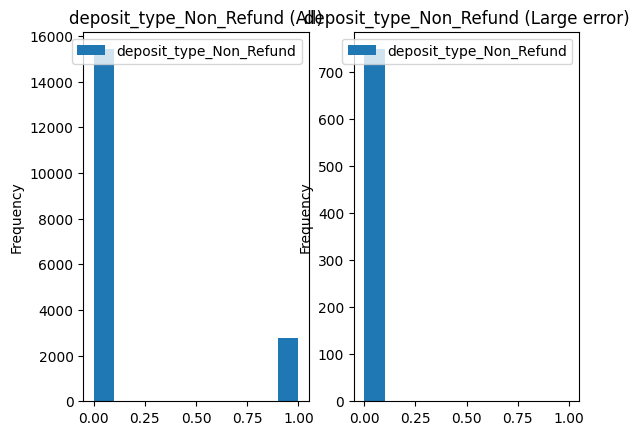

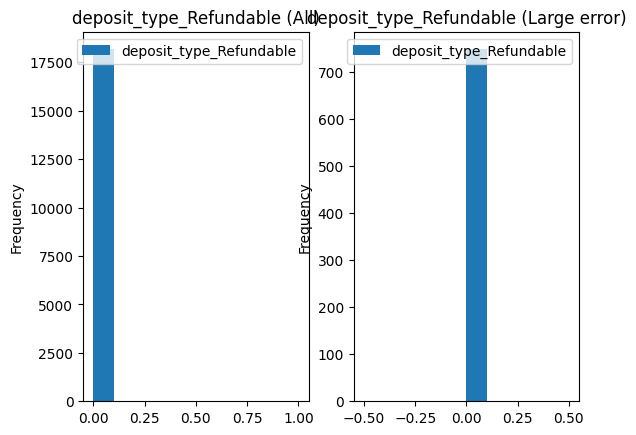

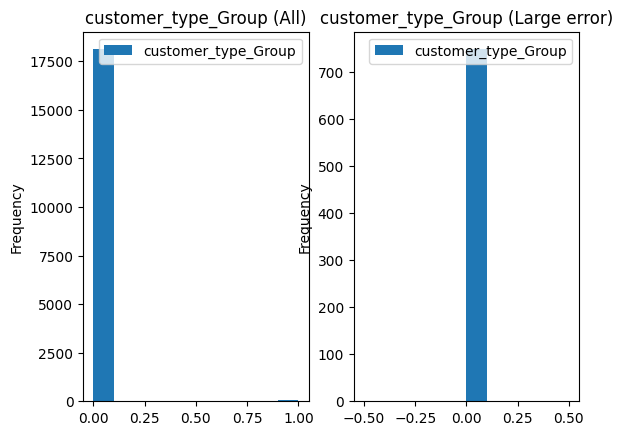

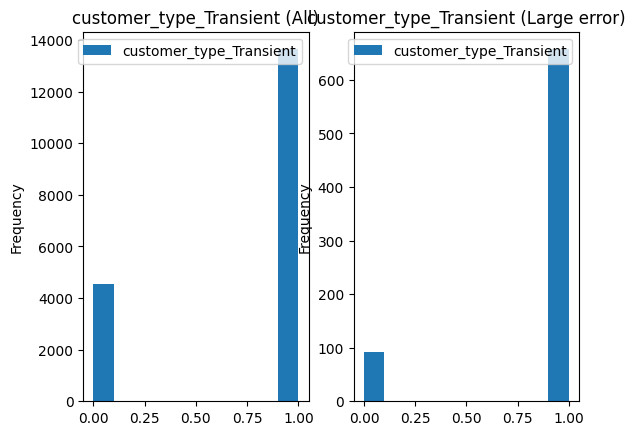

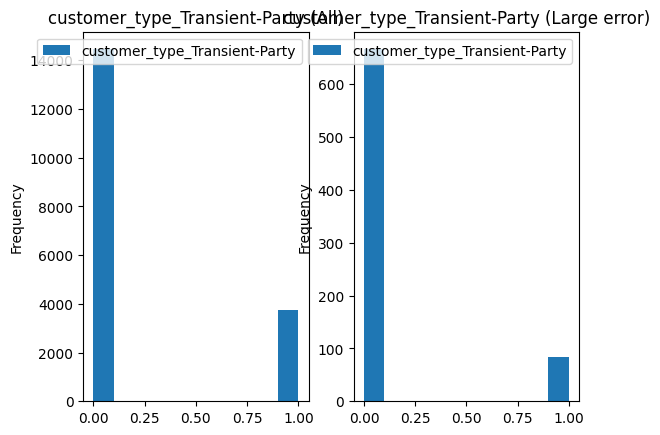

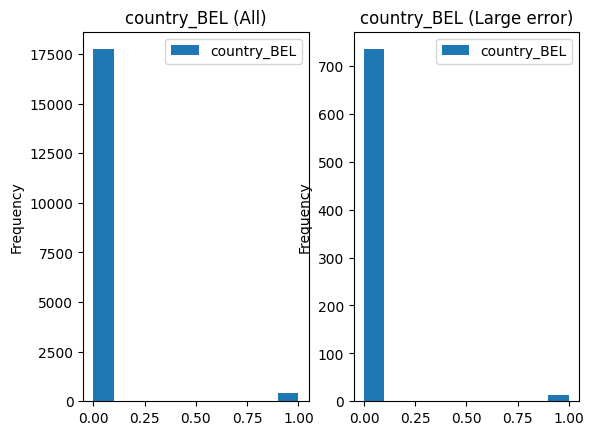

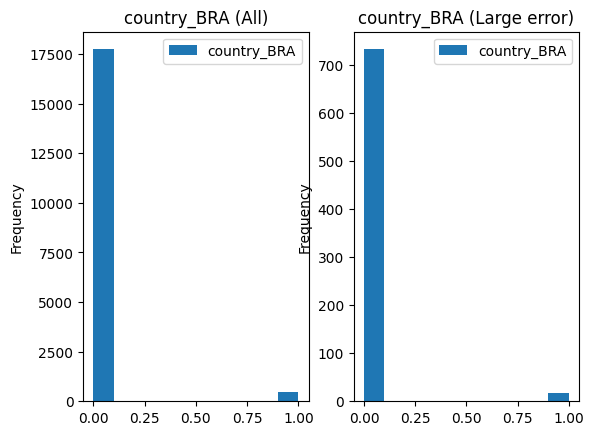

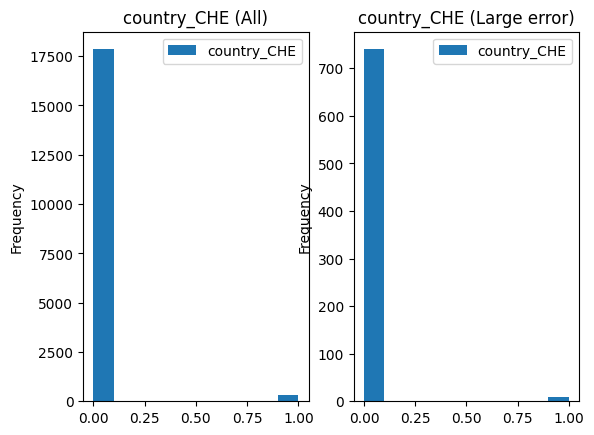

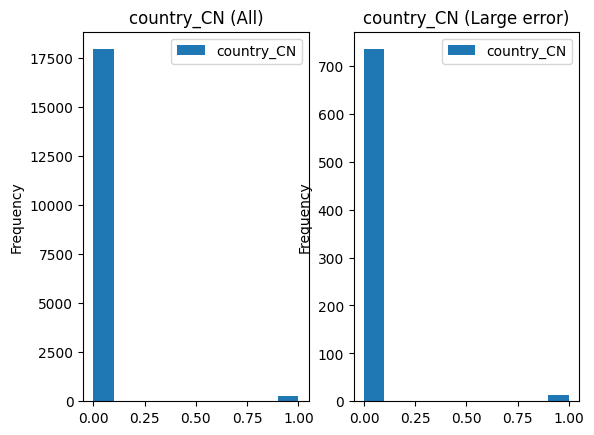

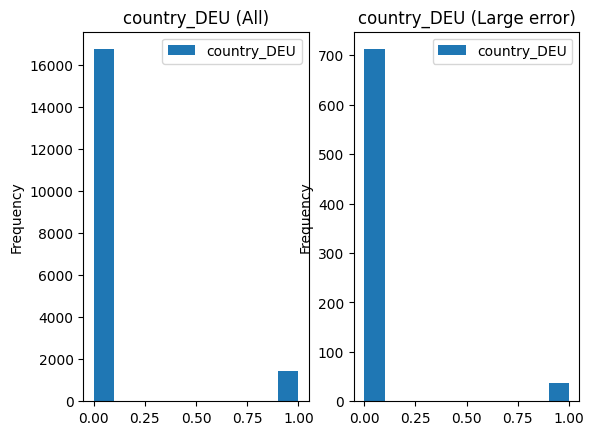

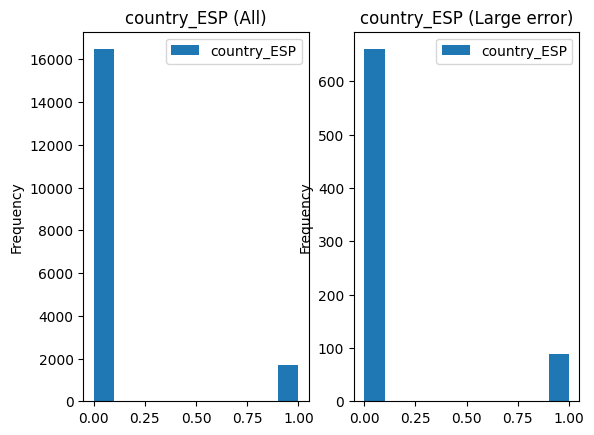

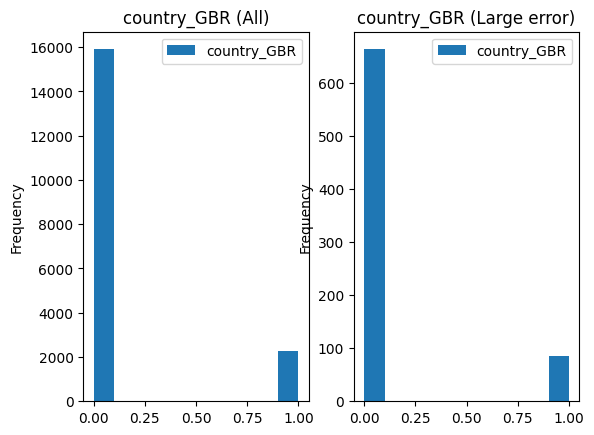

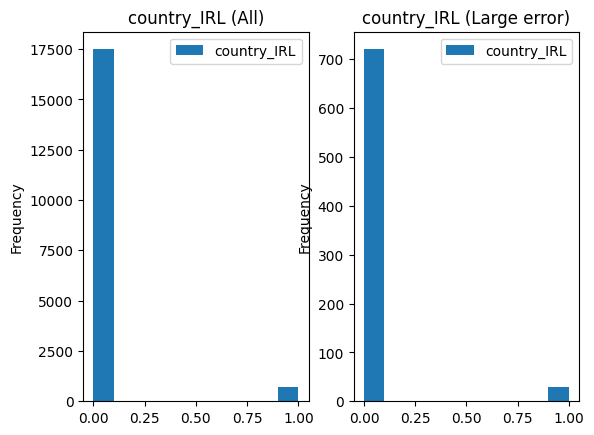

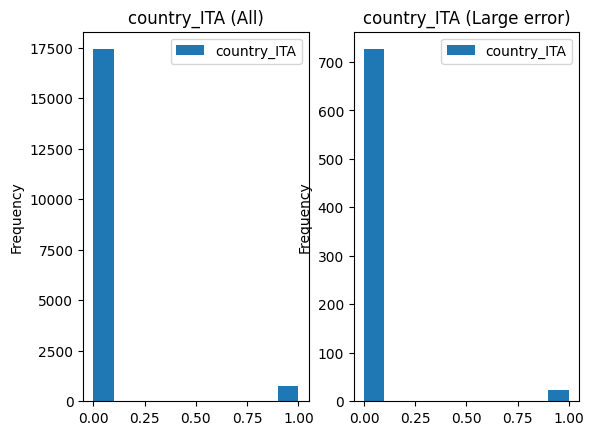

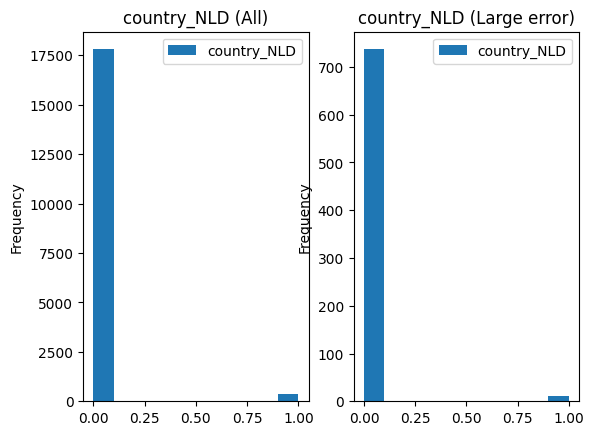

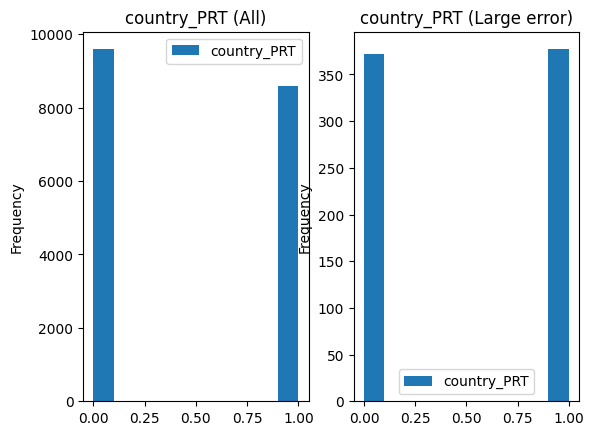

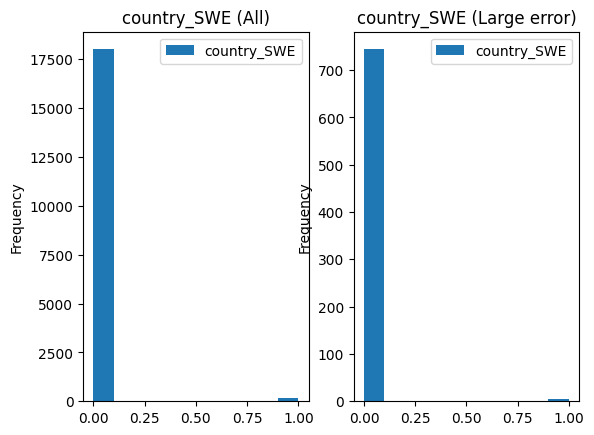

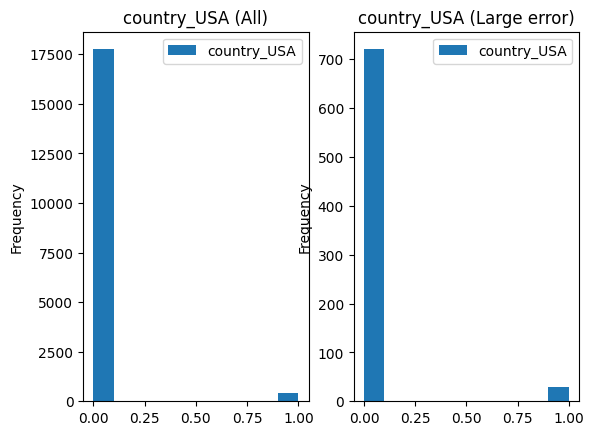

In [ ]:
for column in X_test.columns:
  fig, (ax1, ax2) = plt.subplots(1, 2) # required if we want to plot multiple figures from the same cell
  maindf_with_predictions.plot(kind='hist', y=column, title=f'{column} (All)', ax=ax1)
  maindf_with_predictions[maindf_with_predictions.pred_diff > 50].plot(kind='hist', y=column, title=f'{column} (Large error)', ax=ax2)



> Es scheint, dass es unserem Modell schwerer fällt, die average daily ratio korrekt vorherzusagen bei Buchungen, die in 2017 getätigt wurden (verglichen mit Buchungen in den Vorjahren), für Buchungen in der Hochsaison (Juli, August), wenn für mehr als eine Erwachsene Person gebucht wird und wenn die Durchschnittsteperatur über 20°C liegt (was sich mit der Hochsaison deckt), weicht die Prediction häufig mit über 50€ von dem eigentlichen Wert ab.



## **Multi-Layer Perceptron**

> Zuletzt wenden wir die Methode des Multi-Layer Perceptrons (MLP) für unsere Regression an.

> Unter einem MLP verstehen wir eine Art neuronales Netzwerk mit mehreren Schichten von Neuronen, als einem beliebigen Mix aus Eingabe-, versteckten- und Ausgabeschichten. Eine Regression mit MLP eignet sich sehr gut für strukturierte Daten in tabellarischer Form. Ein solches Modell kann demnach komplexe nicht-lineare Beziehungen zwischen den Features unserer Buchungen und der Average Daily Rate erfassen und letztere sehr gut prognostizieren.

> Dafür laden wir die erforderlichen Pakete `keras` und `tensorflow()` sowie die zugehörigen Funktionen `Sequential()` und `Dense()`.

In [ ]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

> Wir importieren noch zwei letzte erforderliche Funktionen und definieren eine eigene Funktion `r2_score()` zur späteren Berechnung des $R^2$-Scores.

> Imselben Zuge definieren wir die Funktion `build_model()`, die ein Multi-Layer Percept^on (MLP) Modell für Regression konstruiert. Sie verwendet `keras.Sequential()`, die verschiedenen Schichten werden hier also nacheinander gestapelt.

> Wir definieren die die Form der ersten Schicht (Eingabeschicht) mit `X_train.shape[1]` anhand der Anzahl der Spalten in den Trainingsdaten entspricht.

> Die folgenden zwei Schichten enthalten jeweils 84 und 42 Einheiten und werden mit der Aktivierungsfunktion Rectified Linear Unit (ReLU) ausgeführt.

> Die letzte Schicht enthält eine einzige Einheit. Da es sich um eine Regression handelt, legen wir für diese Schicht die Aktivierungsfunktion `linear` fest. Diese Schicht liefert also direkt den vorhergesagten Wert.

> Als Optimierer wird im ersten Anlauf der RMSprop-Algorithmus mit einer Lernrate von 0,001 gesetzt.

> Das Modell wird mit `model.compile()` zusammengestellt. Als Verlustfunktion wählen wir den Mean Absolute Error. Als Optimierer wird `Adam` und als Metrik der zuvor in der Funktion `r2_score()` definierte $R^2$-Score verwendet.

In [ ]:
import tensorflow.keras.backend as K
from keras.optimizers import Adam

def r2_score(y_true, y_pred):
  SS_res = K.sum(K.square(y_true - y_pred))
  SS_tot = K.sum(K.square(y_true - K.mean(y_true)))
  return 1 - SS_res / (SS_tot + K.epsilon())

def build_model():
  model = keras.Sequential([
      keras.layers.Input(shape=(X_train.shape[1],)),
      keras.layers.Dense(84, activation=tf.nn.relu),
      keras.layers.Dense(42, activation=tf.nn.relu),
      keras.layers.Dense(1, activation='linear')
      ], name='MLP_model')

  model.compile(loss='mean_absolute_error',
                optimizer=Adam(),
                metrics=[r2_score])

  return model

model = build_model()
model.summary()

Model: "MLP_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 84)                3612      
                                                                 
 dense_1 (Dense)             (None, 42)                3570      
                                                                 
 dense_2 (Dense)             (None, 1)                 43        
                                                                 
Total params: 7,225
Trainable params: 7,225
Non-trainable params: 0
_________________________________________________________________


> Mithilfe der Funktion `plot_model()` von TensorFlow können wir uns zur besseren Anschaulichkeit die Architektur unseres Modells visualisieren lassen.

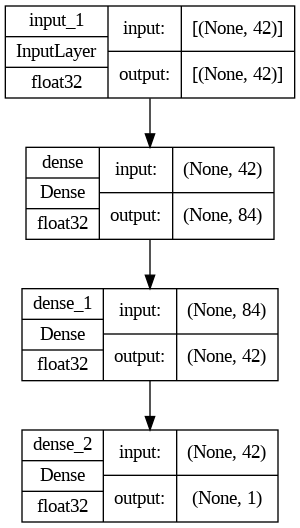

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_dtype=True)

> Wir trainieren das Modell auf den **nicht** skalierten Trainingsdaten und mit einer vordefinierten Anzahl an Epochen von 50, lassen das Modell also 50x über die gesamten Daten iterieren.

> Wir geben an, während des Trainings einen Anteil von 20% der Trainingsdaten für die Validierung verwenden zu wollen.

> Mit `verbose=1` geben wir an, dass wir für jede der 50 Epochen einen Fotschrittsbalken sowie ein kurzes Protokoll einsehen möchten, in dem u.A. der jeweilige Verlust sowie der MAE enthalten ist.

In [ ]:
EPOCHS = 50
history = model.fit(X_train, y_train, epochs=EPOCHS,
                    validation_split=0.2, verbose=1)

Epoch 1/50
1819/1819 [==============================] - 6s 3ms/step - loss: 35.0824 - r2_score: -0.0625 - val_loss: 30.7902 - val_r2_score: 0.1653
Epoch 2/50
1819/1819 [==============================] - 5s 3ms/step - loss: 30.4326 - r2_score: 0.2287 - val_loss: 27.9601 - val_r2_score: 0.3092
Epoch 3/50
1819/1819 [==============================] - 6s 3ms/step - loss: 28.8521 - r2_score: 0.3028 - val_loss: 27.4040 - val_r2_score: 0.3487
Epoch 4/50
1819/1819 [==============================] - 6s 3ms/step - loss: 28.2394 - r2_score: 0.3224 - val_loss: 27.1913 - val_r2_score: 0.3547
Epoch 5/50
1819/1819 [==============================] - 6s 3ms/step - loss: 27.7614 - r2_score: 0.3413 - val_loss: 26.7292 - val_r2_score: 0.3461
Epoch 6/50
1819/1819 [==============================] - 5s 3ms/step - loss: 27.6222 - r2_score: 0.3384 - val_loss: 26.7495 - val_r2_score: 0.3639
Epoch 7/50
1819/1819 [==============================] - 7s 4ms/step - loss: 27.3932 - r2_score: 0.3496 - val_loss: 26.5678 

> Wir definieren 2 Funktionen zur Visualisierung unseres Modells in einem Plot: für den Verlust (Mean Absolute Error) und unsere Metric ($R^2$-Score).



In [ ]:
def plot_loss(history):
  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('Modell: Loss')
  plt.ylabel('Mean Absolute Error [in €]')
  plt.xlabel('Epoche')
  plt.xlim([0,EPOCHS])
  plt.ylim([min(history.history['val_loss'])-1,max(history.history['val_loss'])+1])
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

def plot_metric(history):
  plt.plot(history.history['r2_score'])
  plt.plot(history.history['val_r2_score'])
  plt.title('Modell: Metric')
  plt.ylabel('R2-Score')
  plt.xlabel('Epoche')
  plt.xlim([0,EPOCHS])
  plt.ylim([min(history.history['val_r2_score'])-1,max(history.history['val_r2_score'])+1])
  plt.legend(['train', 'val'], loc='upper left')
  plt.show()

> Wir lassen uns den Plot für den MAE unseres Modells ausgeben. Für jede der 50 Epochen wird uns also der MAE einmal im Training und bei der Validierung geplottet.

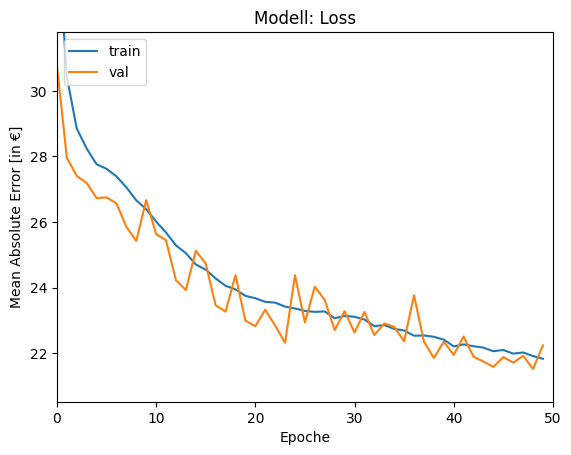

In [ ]:
plot_loss(history)

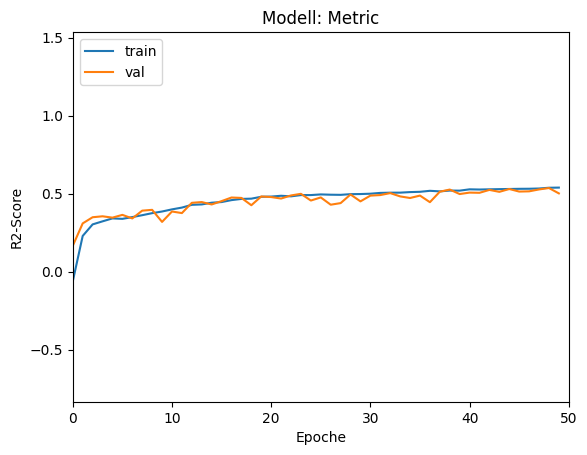

In [ ]:
plot_metric(history)

> Hier erkennen wir sehr gut, wie der MAE sinkt und sich somit stetig verbessert, je mehr Epochen wir durchlaufen lassen. Auch der $R^2$-Score wird über die Epochen hinweg immer besser indem er steigt und sich einem Grenzwert von ~0.5 annährt.

> Während die Linie auf Basis der Trainingsdaten ruhig verläuft, weist die Linie der Validierungs- bzw. Testdaten deutliche Ausschläge auf.

> Den MAE können wir anhand des Graphen vorerst nur abschätzen - er liegt gegen Ende bei ~23€. Wollen wir den niedrigsten - also den optimalen - MAE herausfinden, wenden wir die `evaluate()`-Funktion auf unser Modell an. Mit den geschätzten ~23€ lagen wir nur knapp über dem tatsächlichen MAE von 22.5, unser Modell weist also schon eine recht gute Performance auf.

In [ ]:
#evaluate(model, X_test, y_test)

In [ ]:
predictions = model.predict(X_test)

569/569 [==============================] - 1s 1ms/step


In [ ]:
def plot_prediction(test_labels, test_predictions):
  plt.figure()
  plt.scatter(test_labels, test_predictions)
  plt.xlabel('True Values')
  plt.ylabel('Predictions')
  plt.axis('equal')
  plt.xlim([0, 400])
  plt.ylim([0, 400])
  _ = plt.plot([0, 400],[0,400])

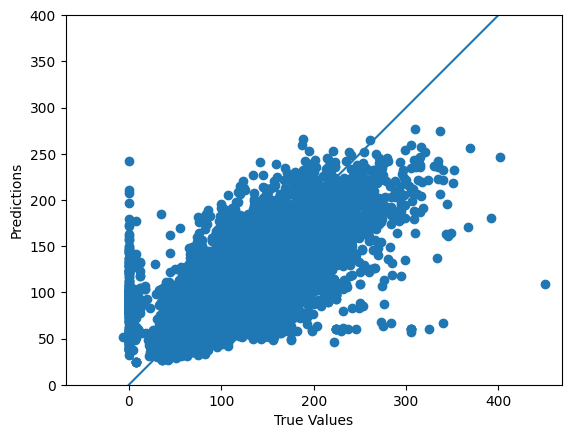

In [ ]:
plot_prediction(y_test, predictions)

### **Hyperparameter Tuning**

> Um in unserem Modell ein Hyperparameter Tuning durchzuführen, verwenden wir die Library `keras_tuner`.

In [ ]:
!pip install keras_tuner
import keras_tuner as kt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 4.0 MB/s eta 0:00:00


> Wir definieren unsere Funktion `build_model()` anhand derer verschiedene Modelle mit variierenden Parametereinstellungen gebaut und bewertet werden.

> Anders als im vorherigen Keras Sequential Modell definieren wir hier zuerst das Modell und fügen dann einzeln unsere Layer hinzu.

In [ ]:
def build_model(hp):
    activation_function = hp.Choice('activation_function', ['relu', 'sigmoid', 'linear'])
    units = hp.Choice('units', [42,84,168])

    model = keras.models.Sequential()
    model.add(keras.layers.Input(shape=(X_train.shape[1])))
    model.add(keras.layers.Dense(units, activation=activation_function))
    model.add(keras.layers.Dense(units, activation=activation_function))
    model.add(keras.layers.Dense(1, activation='linear'))

    model.compile(loss='mean_absolute_error',
                  optimizer=Adam(),
                  metrics=[r2_score])

    return model

> Wir definieren als Tuner die `RandomSearch()`-Funktion. Das Ziel soll es, den Verlust, also den Mean Absolute Error, in unserem Modell zu optimieren/minimieren. Hierbei sollen maximal 20 Kombinationen an Hyperparametern getestet werden.

In [ ]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=20, overwrite = True)

> Wir suchen nach der Kombination an Hyprparameter, bei der unser Modell am besten performt. Wir arbeiten hier mit einer Anzahl an Epochen von 20.

In [ ]:
tuner.search(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Trial 2 Complete [00h 00m 03s]

Best val_loss So Far: None
Total elapsed time: 00h 00m 09s

Search: Running Trial #3

Value             |Best Value So Far |Hyperparameter
sigmoid           |linear            |activation_function
42                |42                |units

Epoch 1/20


Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/base_tuner.py", line 270, in _try_run_and_update_trial
    self._run_and_update_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/base_tuner.py", line 235, in _run_and_update_trial
    results = self.run_trial(trial, *fit_args, **fit_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/tuner.py", line 287, in run_trial
    obj_value = self._build_and_fit_model(trial, *args, **copied_kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/tuner.py", line 214, in _build_and_fit_model
    results = self.hypermodel.fit(hp, model, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras_tuner/engine/hypermodel.py", line 144, in fit
    return model.fit(*args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/keras/utils/traceback_utils.py", line 70, in error_handler
    rais

RuntimeError: ignored

> Wir erkennen, dass die Aktivierungsfunktion `relu()` das beste Ergebnis erzeugt.

In [ ]:
print(tuner.get_best_hyperparameters()[0].values)

{'activation_function': 'relu'}


> Wir definieren das beste der im HT getesteten Modelle als `best_model` und evalueren dieses im nächsten Schritt.

In [ ]:
best_model = tuner.get_best_models()[0]

In [ ]:
#evaluate(best_model, X_test, y_test)

> Auch eine Regression mithilfe von Convolutional Neural Networks (cnn) haben wir für die Analyse in Betracht gezogen. Diese eignet sich allerdings besonders für Daten mit räumlicher Struktur, wie beispielsweise Bilder oder Sequenzen. Für tabellarische numerische btw. kategoriale Daten eignen sich andere Modelle wie ein Multi-Layer Perceptron oder Decision Trees normalerweise besser. Da wir diese bereits durchgeführt haben, können wir auf die Regression mit cnn verzichten.

# **Recap der Regressionsmodelle**

In diesem Notebook wollten wir die Frage beantworten 'Was wird zu einem spezifischen Zeitpunkt der Übernachtungspreis sein?'. Dafür haben wir verschiedene Regressionsmodelle angewandet und kamen zu folgenden Ergebnissen:

Ergebnisse der Classification-Modelle in der Übersicht:

Modell | R2 | MAE
-------------|--------------|--------------
Dummy Regressor | -0.0004499 | 36.81
Ordinary Least Squares| 0.42283 | 27.17
Ridge Regression| 0.42283 | 27.17
SVM | 0.39196 | 26.76
Decision Tree | 0.37982 | 17.03
Decision Tree Hyper | 0.43399 | 16.32
Gradient Boosting | 0.64195 | 20.87
Gradient Boosting Hyper | 0.78722 | 14.1
XGB | 0.750916 | 15.7
XGB Hyper | 0.79624 | 12.37
MLP | 0.5400 | 22.77

Wir sehen eine deutliche Heteregonität der Ergebnisse, insbesondere im Vergleich zu der Klassifikation im letzten Notebook. Die beste Performance mit mit einem R2-Score von 0.79624 und einer mittleren absoluten Abweichung von 12.37 hatte der XG-Boost mit anschließendem Hyperparameter-Tuning. Hierbei ist zu beachten, dass die MAE von knapp 12,50€ bei einem durchschnittlichen Preis von ca. 100€ die Nacht, nicht gerade gering ist.

Bei der Error Analysis ist aufgefallen, dass das Modell Schwierigkeiten hat, wenn Buchungen in 2017, oder in der Hochsaison getätigt worden (Sommermonate und höhere Temparaturen).